In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os

sns.set_theme(context='paper', style='whitegrid', font_scale=1)

In [7]:
def plot_experiment(config, experiment, metric, statistic):
    g = f"result/{experiment}/*-{config}-{metric}.csv"

    # Create an empty list to store individual dataframes
    dataframes = []

    # Iterate over each CSV file using glob
    for file in glob.glob(g):
        # Read the CSV file into a dataframe
        df = pd.read_csv(file)
        # Add a new column with the filename
        df['filename'] = file

        df = df.iloc[-2:-1]

        # Append the dataframe to the list
        dataframes.append(df)

    # Concatenate all dataframes into a single dataframe
    df = pd.concat(dataframes, ignore_index=True)
    # df = df.drop("filename", axis=1)
    # df = df.groupby(["experiment", "task", "config", "timestamp"]).mean()
    # df = df.reset_index()
    df = df.sort_values(["experiment", "task"])
    # print(df.head())

    # print(df.head())
    g = sns.catplot(data=df, x="task", y=statistic, hue="experiment", kind="bar", aspect=2)
    g.set_titles(template="")
    g.set_xticklabels(rotation=30)

    # for i, row in df.iterrows():
    #     x_pos = g.ax.get_xticks()[i]  # Get the categorical x-axis position
    #     plt.errorbar(x_pos, row['p50'], yerr=[[row['p50'] - row['p10']], [row['p90'] - row['p50']]], color='k')

    # plt.tight_layout()
    try:
        os.mkdir("plot")
    except:
        pass
    plt.savefig(f"plot/{experiment}-{config}-{metric}.pdf".replace("*", "all"), bbox_inches="tight")

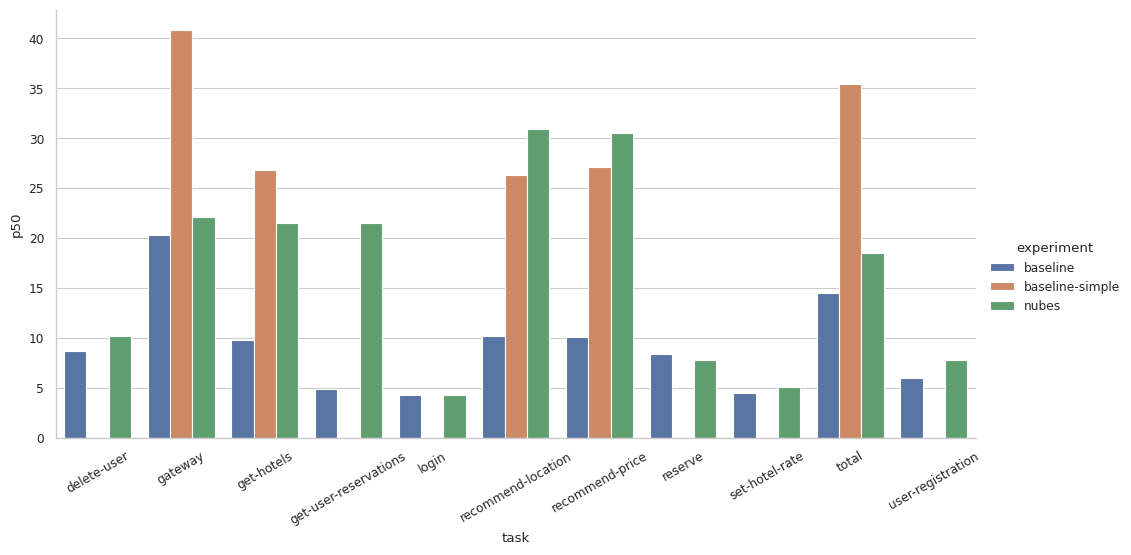

In [8]:
plot_experiment(
    config="small-r1000-120s",
    experiment="*",
    metric="duration",
    statistic="p50",
)

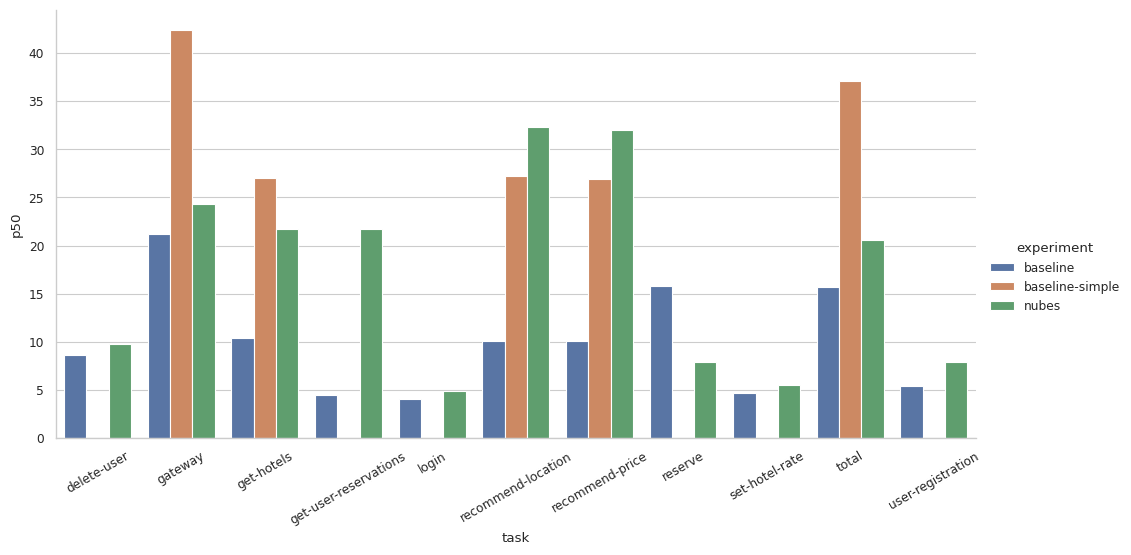

In [9]:
plot_experiment(
    config="small-r100-120s",
    experiment="*",
    metric="duration",
    statistic="p50",
)

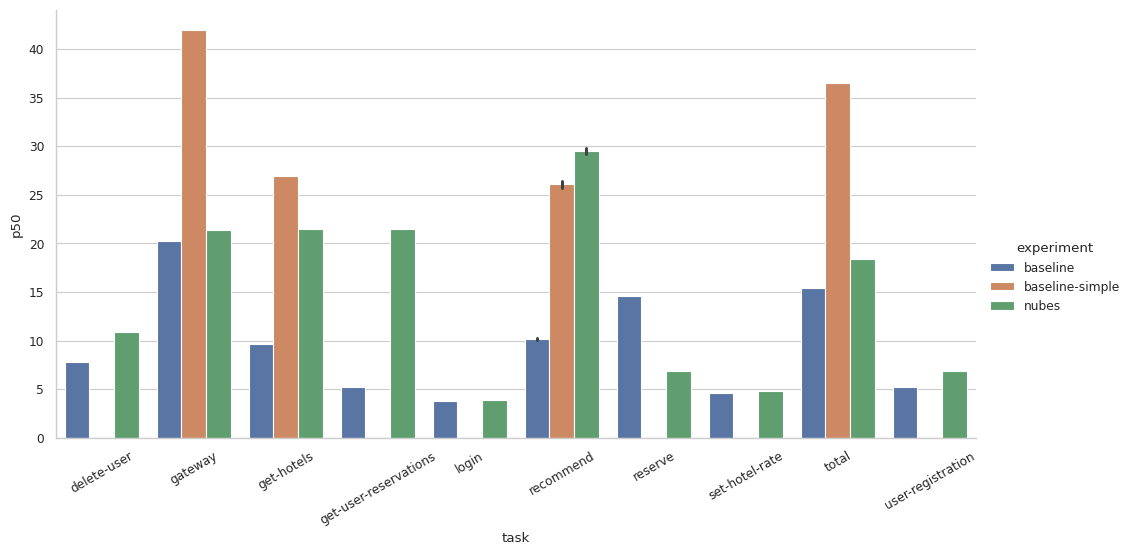

In [10]:
plot_experiment(
    config="medium*r100*",
    experiment="*",
    metric="duration",
    statistic="p50",
)